In [1]:
#imports
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

In [2]:
df = pd.read_csv('Data/data_cleaned.csv')

In [3]:
def descriptive_stats(col):
    unique_values = df[col].unique()

    print(f'{df[col].describe()}\n \
    \n# of Unique values:{df[col].nunique()} \
    \n\nUnique values: {unique_values}')
    
    if df[col].dtypes != object:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        IQR = Q3 - Q1

        min_boxplot = Q1 - (1.5 * IQR)
        max_boxplot = Q3 + (1.5 * IQR)
        print(f'\nMin of boxplot:{min_boxplot: .2f}\nMax of boxplot: {max_boxplot:.2f}')       

In [4]:
def plotcat(feature):
    plt.figure(figsize=(12,8))
    sns.countplot(x=feature, hue='shot_made_flag', data=df, palette={1:'gold', 0:'purple'});

    plt.title(feature + ' vs target', 
              fontsize=18, fontweight='bold', color='firebrick', loc='left')
    
    plt.ylabel('count', fontsize=16)
    plt.xlabel(feature, fontsize=16)

    color_patches = [
        Patch(facecolor="gold", label='Shot Made'),
        Patch(facecolor="purple", label='Shot Missed')
    ]

    plt.legend(handles=color_patches)

    plt.xticks(rotation=45, fontsize=14); 

In [5]:
def box_plot(column_name):
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 10))

    sns.boxplot(data=df[column_name], 
                ax=ax1,
                showmeans=True, 
                width=0.5,
                palette=('gold', 8))
    
    ax2.hist(df[column_name], color='purple', orientation='horizontal')    

    ax1.set_title(column_name + ' - Boxplot',
                 fontsize=18, 
                 fontweight='bold', 
                 color='firebrick', 
                 loc='left')
    ax2.set_title(column_name + ' Frequency',
                 fontsize=18, 
                 fontweight='bold', 
                 color='firebrick', 
                 loc='left')
    
    ax1.set_ylabel(column_name, fontsize=16)
    
    ax2.set_ylabel(column_name, fontsize=16)
    ax2.set_xlabel('Frequency', fontsize=16)
    
    ax1.tick_params(axis='both', which='major', labelsize=14)
    ax2.tick_params(axis='both', which='major', labelsize=14)

    ax1.set_facecolor('whitesmoke')
    ax2.set_facecolor('whitesmoke');

In [6]:
def multihist(col):
    plt.figure(figsize=(12,8))
    plt.hist(df[df['shot_made_flag']==1][col], 
             bins=10, alpha=0.7, color='black', label='Shot Made')
    plt.hist(df[df['shot_made_flag']==0][col], 
             bins=10, alpha=0.5, color='gold', label='Shot Missed')

    plt.title(col + ' vs Shot Made', 
              fontsize=18, fontweight='bold', color='firebrick', loc='left')
    
    plt.xlabel(col, fontsize=14)
    plt.ylabel('count', fontsize=14)

    plt.legend();

### EDA

### Season

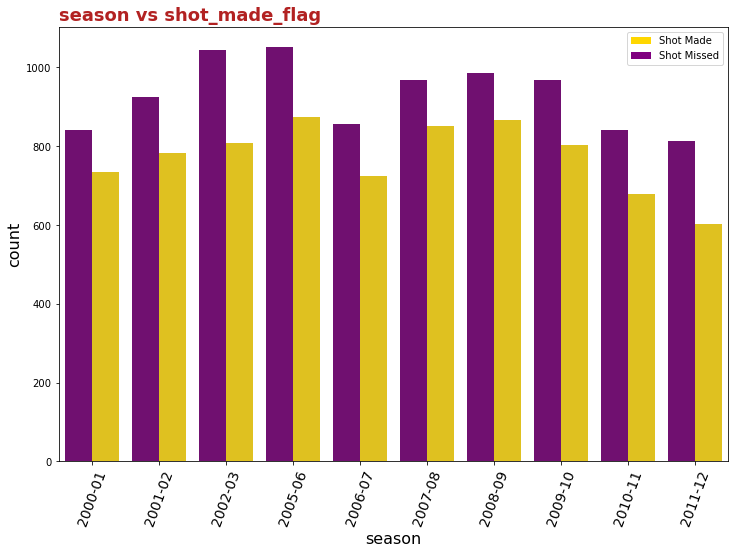

In [29]:
top_10_most_season = df['season'].value_counts()[:10].index

plt.figure(figsize=(12,8))
sns.countplot(x='season', hue='shot_made_flag', data=df.loc[df['season'].isin(top_10_most_season)]
              , palette={1:'gold', 0:'purple'});

plt.title('season' + ' vs shot_made_flag', 
          fontsize=18, fontweight='bold', color='firebrick', loc='left')

plt.ylabel('count', fontsize=16)
plt.xlabel('season', fontsize=16)

color_patches = [
    Patch(facecolor="gold", label='Shot Made'),
    Patch(facecolor="purple", label='Shot Missed')
]

plt.legend(handles=color_patches)

plt.xticks(rotation=70, fontsize=14); 

For the shots made, Kobe Bryant missed more shots than made for the top 10 seasons.  His best season was 2005-06. His worst season was 2011-12.

### Seconds remaining

In [50]:
descriptive_stats('seconds_remaining')

count    25697.000000
mean        28.311554
std         17.523392
min          0.000000
25%         13.000000
50%         28.000000
75%         43.000000
max         59.000000
Name: seconds_remaining, dtype: float64
     
# of Unique values:60     

Unique values: [22 45 52 19 32 12 36 56  0  9 44 16 48 50 29  8  4 57 47 11 30 20 13 59
 21 55 38  6 33 26 40  5  2 37  1 17 53 10 24 46 41 54 25 15 39 14 23 18
 34 51 28  3 43  7 42 27 35 31 58 49]

Min of boxplot:-32.00
Max of boxplot: 88.00


In [33]:
df.seconds_remaining.skew()

0.03525222199685529

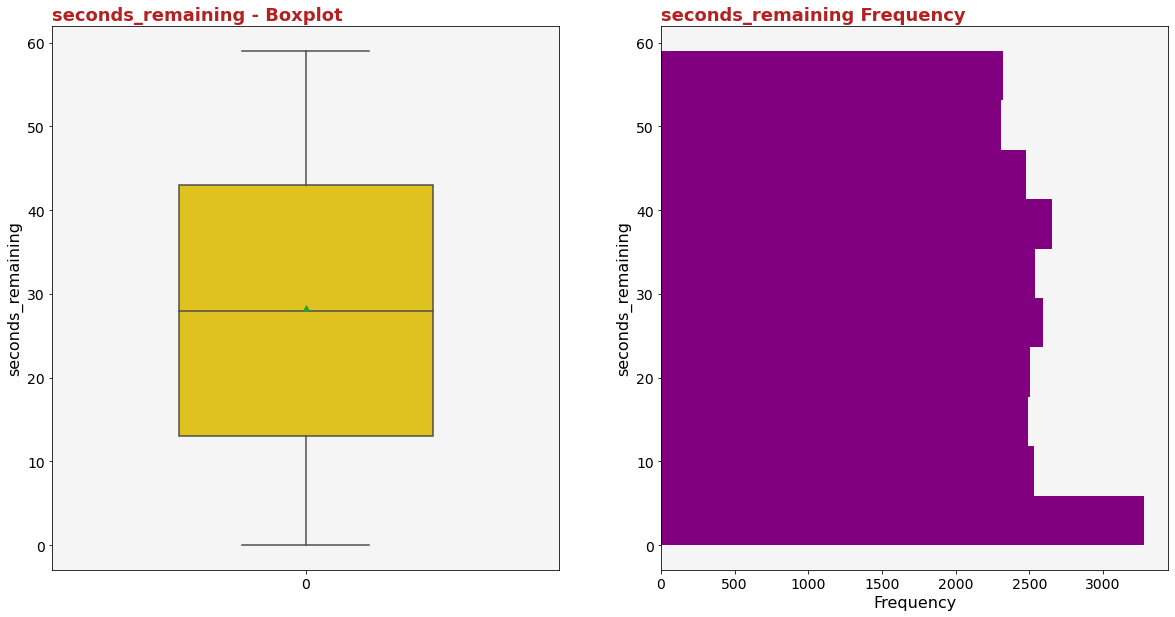

In [32]:
box_plot('seconds_remaining')

The mean and median are approximately the same.  The maximum time to make a shot is 59 seconds, and the minimum time is 0 seconds.  The data is positively skewed, and shows a large degree of spread. 

### Shot distaince

In [54]:
df.groupby('shot_distance')['shot_made_flag'].value_counts()

shot_distance  shot_made_flag
0              1.0               2925
               0.0               1683
1              1.0                345
               0.0                177
2              1.0                257
                                 ... 
70             0.0                  2
71             0.0                  1
74             0.0                  3
77             0.0                  1
79             0.0                  1
Name: shot_made_flag, Length: 111, dtype: int64

In [49]:
descriptive_stats('shot_distance')

count    25697.000000
mean        13.457096
std          9.388725
min          0.000000
25%          5.000000
50%         15.000000
75%         21.000000
max         79.000000
Name: shot_distance, dtype: float64
     
# of Unique values:74     

Unique values: [15 16 22  0 14 12 25 17  9  5 20 18 11  7 26 19  8 13 27  1 24 23  4 21
 47 10 29 28 42  3 48 30 45  2  6 33 36 62 31 70 43 38 60 37 40 32 56 35
 55 51 68 39 41 64 50 54 74 44 61 65 59 34 63 49 46 58 69 57 53 67 71 52
 77 79]

Min of boxplot:-19.00
Max of boxplot: 45.00


In [35]:
df.shot_distance.skew()

0.12720932371341717

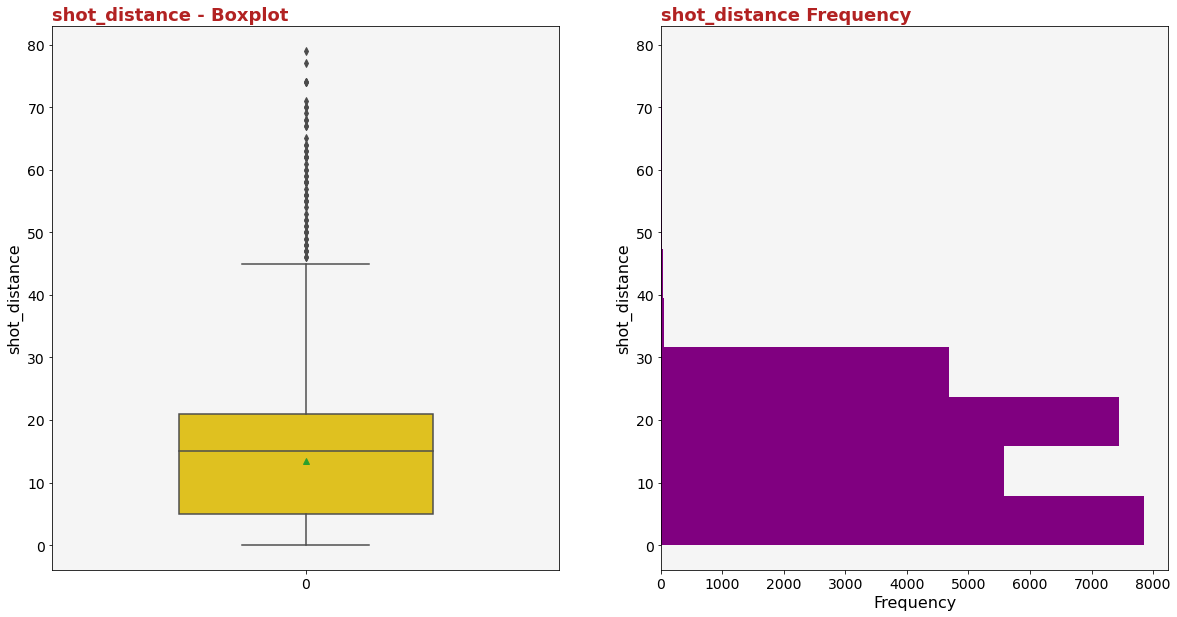

In [36]:
box_plot('shot_distance')

For shot distance, it's pretty apparent that most shots are made close to the basketball hoop (< 25).  The mean is offset slightly from the median.  The IQR is fairly small, with outliers occuring around the 45 mark.

### Shot type

In [52]:
descriptive_stats('shot_type')

count              25697
unique                 2
top       2PT Field Goal
freq               20285
Name: shot_type, dtype: object
     
# of Unique values:2     

Unique values: ['2PT Field Goal' '3PT Field Goal']


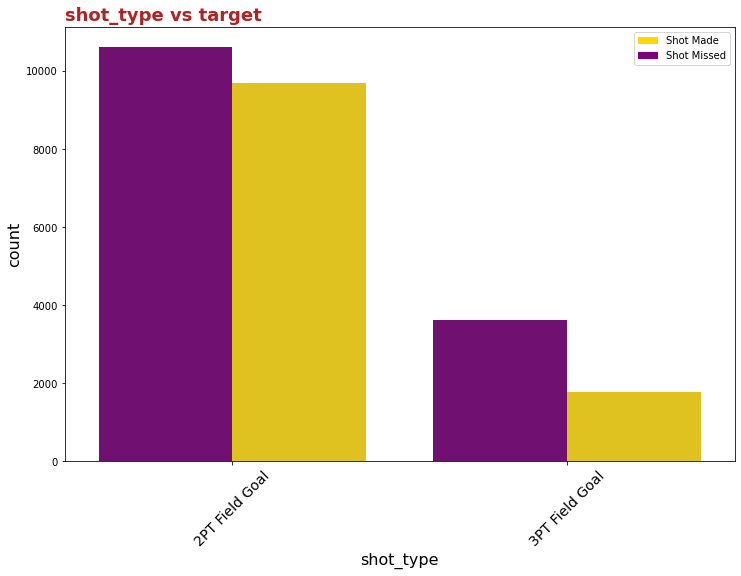

In [53]:
plotcat('shot_type')

The most common shot type was the 2PT field goal with over 10,000 missed, and over 9,000 made.  

### Shot zone area

In [56]:
descriptive_stats('shot_zone_area')

count         25697
unique            6
top       Center(C)
freq          11289
Name: shot_zone_area, dtype: object
     
# of Unique values:6     

Unique values: ['Left Side(L)' 'Left Side Center(LC)' 'Right Side Center(RC)' 'Center(C)'
 'Right Side(R)' 'Back Court(BC)']


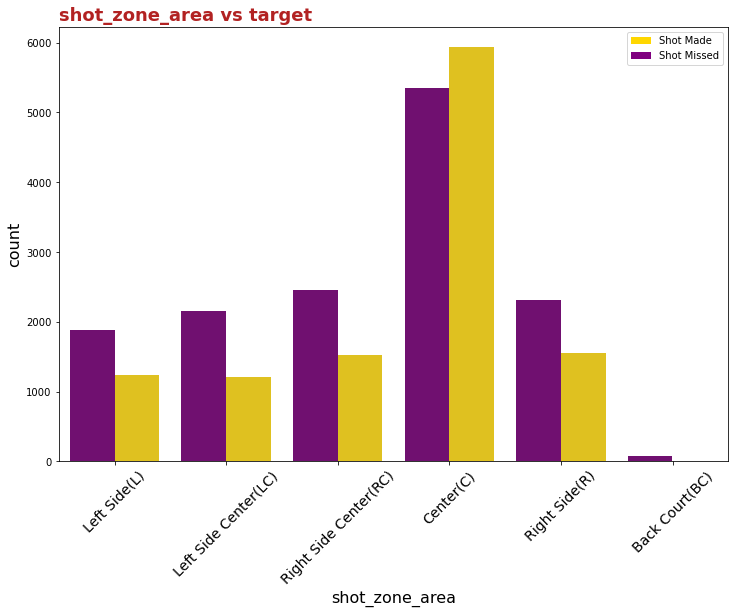

In [57]:
plotcat('shot_zone_area')

By far, the most common shot zone was the center